# Aplicación del Algoritmo de Optimización de Lobo Gris Discreto (DGWO) en la Distribución de Instalaciones con Áreas Desiguales (UAFLP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problema de ejemplo para pruebas (O7)

In [23]:
# O7
n_dptos = 7
departamentos = np.arange(1, n_dptos + 1)
areas_dptos = np.array([16, 16, 16, 36, 9, 9, 9])
fl_materiales = np.array([[0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [5, 3, 2, 0, 0, 0, 0],
                          [0, 0, 0, 4, 0, 0, 0],
                          [0, 0, 0, 4, 0, 0, 0],
                          [1, 1, 1, 0, 2, 1, 0]])
lados_inst = np.array([8.54, 13]) # ancho, largo
max_rel_aspecto = 4
nombres_dptos = None
costo_manejo_unitario = None

solucion = np.array([[3, 5, 7, 1, 4, 6, 2], 
                     [0, 0, 1, 0, 0, 0, 1]])

## 1. Definición del modelo UAFLP

### 1.1 Método para la decodificación de la solución

**Entradas**: Array con una solución `np.array([dptos], [bahias])`

Se requieren los siguientes pasos:

* **Identificar bahias**: Retorna una lista con los departamentos en cada bahía: `bahias`.


* **Calcular dimensiones y centroides de los departamentos**:  Retorna una lista con las dimensiones de ancho y largo de cada departamento `lados_dptos` y otra lista con las coordenadas en $x$ y $y$ de los centroides de cada departamento `centroides_dptos`.

In [ ]:
## Identificar bahias
bahias = []
dpts_bahias = []

for ind, bah in enumerate(solucion[1]):
    dpto = solucion[0, ind]

    if ind == 0 or bah == 0:
        dpts_bahias.append(dpto)
        if bah == 1:
            bahias.append(dpts_bahias)
            dpts_bahias = []
    elif bah == 1:
        dpts_bahias.append(dpto)
        bahias.append(dpts_bahias)
        dpts_bahias = []

In [ ]:
bahias

In [ ]:
## Obtener dimensiones de lados y centroides de departamentos
centroides_dptos = [0] * n_dptos
lados_dptos = [0] * n_dptos

contador_ancho = 0
for bah in bahias:
    
    area_bahia = 0
    for dpto in bah:
        area_bahia += areas_dptos[dpto-1]
        
    ancho_bahia = area_bahia / lados_inst[1]
    
    contador_largo = 0
    for dpto in bah:
        largo_dpto = areas_dptos[dpto-1] / ancho_bahia
        lados_dptos[dpto-1] = [ancho_bahia, largo_dpto]
        centro_x = contador_ancho + ancho_bahia / 2
        centro_y = contador_largo + largo_dpto / 2
        centroides_dptos[dpto-1] = [centro_x, centro_y]
        contador_largo += largo_dpto
        
    contador_ancho += ancho_bahia        

In [ ]:
centroides_dptos

In [ ]:
lados_dptos

### 1.2 Método para dibujar el plano de planta de la solución

**Entradas**: 

* Array con una solución `np.array([dptos], [bahias])`
* Lista de los departamentos en cada bahía `bahias`
* Lista con las dimensiones de lados de los departamentos `lados_dptos`
* Lista con las coordenadas de los centroides de los departamentos `centroides_dptos`

Retorna un layout de bloques con la ubicación de los departamentos en el plano de planta, de acuerdo con la solución dada.

In [ ]:
# Dibujar layout de planta de la solucion
if nombres_dptos == None:
    nombres_dptos = [f'Dpto {d}' for d in departamentos]

if lados_inst[0] > lados_inst[1]:
    fig = plt.figure(dpi=300, figsize=(3, 2))
else:
    fig = plt.figure(dpi=300, figsize=(2, 3))
    
plt.rcParams.update({'font.size': 6})
ax = fig.add_subplot(111)
ax.set_xlim([0, lados_inst[0]])
ax.set_ylim([0, lados_inst[1]])
ax.set_xticks([0, lados_inst[0]])
ax.set_yticks([0, lados_inst[1]])

esq_x = 0
for bah in bahias:
    
    esq_y = 0
    for dpt in bah:
        rect = plt.Rectangle((esq_x, esq_y), width=lados_dptos[dpt-1][0],
                            height=lados_dptos[dpt-1][1], facecolor='white',
                            edgecolor='black')
        plt.text(centroides_dptos[dpt-1][0], centroides_dptos[dpt-1][1],
                f'{nombres_dptos[dpt-1]}', horizontalalignment='center',
                verticalalignment='top')
        plt.plot(centroides_dptos[dpt-1][0], centroides_dptos[dpt-1][1],
                color='black', marker=None, markersize=2)
        ax.add_patch(rect)
        
        esq_y += lados_dptos[dpt-1][1]
        
    esq_x += lados_dptos[dpt-1][0]
    
plt.show()

### 1.2 Método para calcular la función *fitness* de la solución

Se requieren los siguientes pasos:

* **Calcular las distancias entre departamentos**: Retorna una matriz triangular inferior con las distancias *rectilíneas*  entre cada par de departamentos: `distancias_dptos`


* **Calcular el costo de manejo de materiales**: Retorna el valor de la función objetivo del modelo: `mhc`.


* **Calcular la función fitness**: Retorna el valor de la función *fitness*, considerando penalizaciones por incumplimiento de la restricción de aspecto máxima definida para cada uno de los departamentos en la instalación: `fitness`.


In [ ]:
# Calcular las distancias rectilíneas entre departamentos
distancias_dptos = np.zeros((n_dptos, n_dptos))

for i in departamentos:
    for j in departamentos[i:]:
        dist_rectil_x = np.abs(centroides_dptos[i-1][0] - centroides_dptos[j-1][0])
        dist_rectil_y = np.abs(centroides_dptos[i-1][1] - centroides_dptos[j-1][1])
        
        distancias_dptos[j-1, i-1] = dist_rectil_x + dist_rectil_y

In [ ]:
distancias_dptos

In [ ]:
# Calcular el costo total de manejo de materiales

# Crear una matriz con el costo de manejo por unidad
matriz_costos_dptos = None
if costo_manejo_unitario == None: 
    matriz_costos_dptos = np.ones((n_dptos, n_dptos))
else:
    matriz_costos_dptos = np.full((n_dptos, n_dptos), costo_manejo_unitario)

    
mhc = np.sum(matriz_costos_dptos * distancias_dptos * fl_materiales)

In [ ]:
mhc

In [ ]:
# Calcular función fitness
k = 3

contador_rompen_restr = 0
for i in solucion[0]:
    tasa_aspecto = max(lados_dptos[i-1][0], lados_dptos[i-1][1]) / min(lados_dptos[i-1][0], lados_dptos[i-1][1])
    
    if tasa_aspecto > max_rel_aspecto:
        contador_rompen_restr += 1
        
fitness = mhc + mhc * (contador_rompen_restr ** k)

In [ ]:
fitness

### 1.3 Creación de la clase `ModeloUAFLP` para su aplicación usando el DGWO

Las clases permiten generar *objetos* que contienen atributos y métodos, que a su vez pueden ser manipulados por otras clases.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class ModeloUAFLP:
    
    # Constructor de la clase (argumentos requeridos para crear la clase)
    def __init__(self, n_dptos:int, areas_dptos:np.ndarray, flujo_materiales:np.ndarray,
                lados_instalacion:np.ndarray, tasa_aspecto_max:int, costo_manejo_unit:float=None,
                nombres_dptos:list=None, archivo_datos:str=None) -> None:
        
        if archivo_datos == None:
            self.n_dptos = n_dptos
            self.departamentos = np.arange(1, self.n_dptos + 1)
            self.areas_dptos = areas_dptos
            self.flujo_materiales = flujo_materiales
            self.lados_instalacion = lados_instalacion # ancho, largo
            self.tasa_aspecto_max = tasa_aspecto_max
            self.nombres_dptos = nombres_dptos
            self.costo_manejo_unit = costo_manejo_unit
            
            # Definir matriz de costo de manejo unitario
            if self.costo_manejo_unit == None:
                matriz_costos_dptos = np.ones((self.n_dptos, self.n_dptos))
            else:
                matriz_costos_dptos = np.full((self.n_dptos, self.n_dptos), self.costo_manejo_unit)
        else: # Crear construcción para extraer datos de archivo de datos
            pass 
                
    # Método para decodificar la solución 
    def decodificar_solucion(self, solucion:np.ndarray):
        self.identificar_bahias(solucion)
        self.calcular_lados_centros()
    
    # Identificar bahías
    def identificar_bahias(self, solucion):
        self.bahias = []
        dpts_bahias = []

        for ind, bah in enumerate(solucion[1]):
            dpto = solucion[0, ind] # Identificar dpto en posicion

            if ind == 0 or bah == 0:
                dpts_bahias.append(dpto) # Añadir dptos en bahía
                if bah == 1:
                    self.bahias.append(dpts_bahias) # Añadir bahía a bahías
                    dpts_bahias = []
            elif bah == 1:
                dpts_bahias.append(dpto) # Añadir dptos en bahía
                self.bahias.append(dpts_bahias) # Añadir bahía a bahías
                dpts_bahias = []
    
    # Calcular dimensiones de lados y centroides de los departamentos
    def calcular_lados_centros(self):
        self.centroides_dptos = [0] * self.n_dptos
        self.lados_dptos = [0] * self.n_dptos

        contador_ancho = 0
        for bah in self.bahias:

            area_bahia = 0
            for dpto in bah:
                area_bahia += areas_dptos[dpto-1] # area bahia = suma(areas dptos en bahia)

            ancho_bahia = area_bahia / lados_inst[1] # ancho bahia = area de bahia / largo de instalacion

            contador_largo = 0
            for dpto in bah:
                largo_dpto = areas_dptos[dpto-1] / ancho_bahia # largo dpto = area dpto / ancho bahia
                self.lados_dptos[dpto-1] = [ancho_bahia, largo_dpto] # Nota: ancho bahia == ancho dpto en bahia
                centro_x = contador_ancho + ancho_bahia / 2
                centro_y = contador_largo + largo_dpto / 2
                self.centroides_dptos[dpto-1] = [centro_x, centro_y]
                contador_largo += largo_dpto

            contador_ancho += ancho_bahia

    # Dibujar layout de planta de la solucion
    def dibujar_layout(self, solucion:np.ndarray):
        if self.nombres_dptos == None:
            self.nombres_dptos = [f'Dpto {d}' for d in self.departamentos]

        self.decodificar_solucion(solucion)

        if self.lados_instalacion[0] > self.lados_instalacion[1]:
            fig = plt.figure(dpi=300, figsize=(6, 4))
        else:
            fig = plt.figure(dpi=300, figsize=(4, 6))

        plt.rcParams.update({'font.size': 6})
        ax = fig.add_subplot(111)
        ax.set_xlim([0, self.lados_instalacion[0]])
        ax.set_ylim([0, self.lados_instalacion[1]])
        ax.set_xticks([0, self.lados_instalacion[0]])
        ax.set_yticks([0, self.lados_instalacion[1]])

        esq_x = 0
        for bah in self.bahias:

            esq_y = 0
            for dpt in bah:
                rect = plt.Rectangle((esq_x, esq_y), width=self.lados_dptos[dpt-1][0],
                                     height=self.lados_dptos[dpt-1][1], facecolor='white',
                                     edgecolor='black')
                plt.text(self.centroides_dptos[dpt-1][0], self.centroides_dptos[dpt-1][1],
                         f'{self.nombres_dptos[dpt-1]}', horizontalalignment='center',
                         verticalalignment='top')
                plt.plot(self.centroides_dptos[dpt-1][0], self.centroides_dptos[dpt-1][1],
                         color='black', marker=None, markersize=2)
                ax.add_patch(rect)

                esq_y += self.lados_dptos[dpt-1][1]

            esq_x += self.lados_dptos[dpt-1][0]

        plt.show()

    # Calcular la función fitness
    def calcular_fitness(self, solucion:np.ndarray):
        self.decodificar_solucion(solucion)
        self.calcular_distancias()
        self.calcular_mhc()

        k = 3

        contador_no_factibles = 0
        for i in solucion[0]:
            tasa_aspecto_dpto = max(self.lados_dptos[i-1][0], self.lados_dptos[i-1][1]) / min(self.lados_dptos[i-1][0], self.lados_dptos[i-1][1])

            if tasa_aspecto_dpto > self.tasa_aspecto_max:
                contador_no_factibles += 1

        fitness = self.mhc + self.mhc * (contador_no_factibles ** k)

        return round(fitness, ndigits=2)

    # Calcular las distancias rectilíneas entre departamentos
    def calcular_distancias(self):
        self.distancias_dptos = np.zeros((self.n_dptos, self.n_dptos))

        for i in self.departamentos:
            for j in self.departamentos[i:]:
                dist_rectil_x = np.abs(self.centroides_dptos[i-1][0] - self.centroides_dptos[j-1][0])
                dist_rectil_y = np.abs(self.centroides_dptos[i-1][1] - self.centroides_dptos[j-1][1])

                self.distancias_dptos[j-1, i-1] = dist_rectil_x + dist_rectil_y

    # Calcular el costo total de manejo de materiales entre departamentos
    def calcular_mhc(self):
        self.matriz_costos_dptos = None

        if self.costo_manejo_unit == None:
            self.matriz_costos_dptos = np.ones((self.n_dptos, self.n_dptos))
        else:
            self.matriz_costos_dptos = np.full((self.n_dptos, self.n_dptos), self.costo_manejo_unit)

        self.mhc = np.sum(self.matriz_costos_dptos * self.distancias_dptos * self.flujo_materiales)

## 2. Algoritmo de Optimización de Lobo Gris Discreto (DGWO)

In [29]:
uaflp = ModeloUAFLP(n_dptos=n_dptos, areas_dptos=areas_dptos, flujo_materiales=fl_materiales, lados_instalacion=lados_inst,
                    tasa_aspecto_max=max_rel_aspecto, costo_manejo_unit=costo_manejo_unitario)

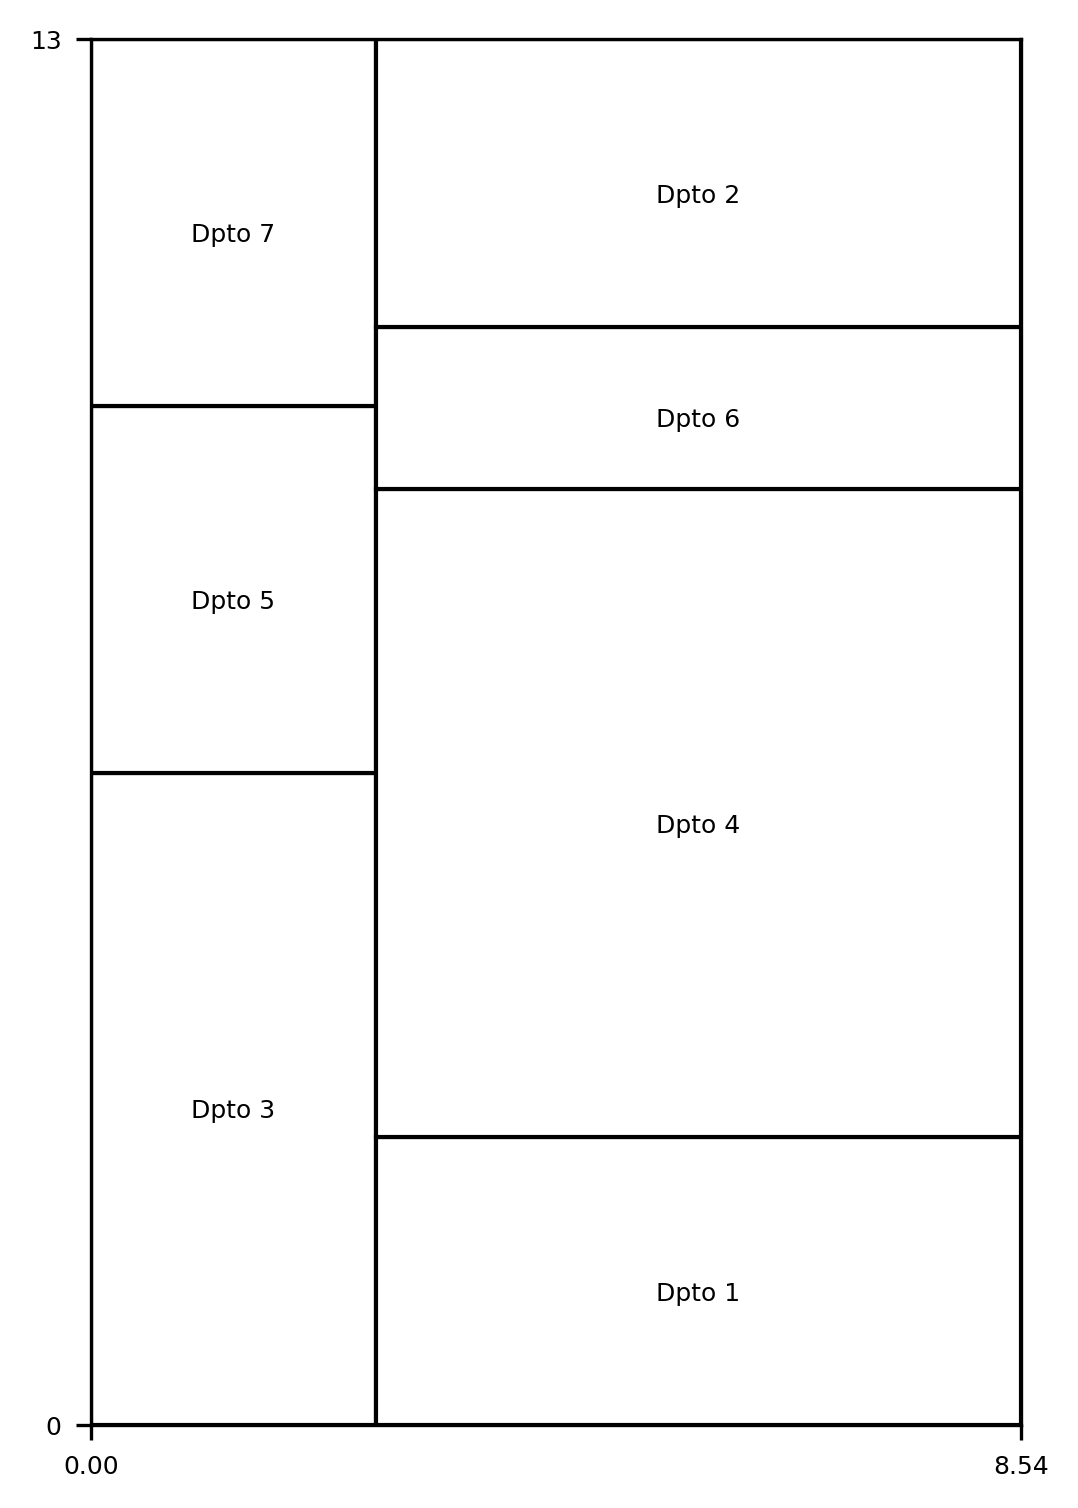

In [24]:
uaflp.dibujar_layout(solucion)

In [30]:
uaflp.calcular_fitness(solucion)

134.19

### 2.1 Definir parámetros del algoritmo

In [35]:
tam_manada = 12 # max 12
n_lideres = 3 # 1 o 3
theta_1 = 0.4 # < 1
theta_2 = 0.2 # < 1

### 2.2 Inicializar población e identificar líderes

Se requieren los siguientes pasos:

* **Generar lobos en manada**:

* **Identificar líderes de la manada**:

In [54]:
# Generar lobos en manada
manada = [0] * tam_manada
fit_manada = [0] * tam_manada

for lobo_ind in range(tam_manada):
    lobo_dpts = list(np.random.permutation(departamentos))
    lobo_bahs = list(np.random.randint(0, 2, n_dptos-1)) + [1]
    manada[lobo_ind] = np.array([lobo_dpts, lobo_bahs])
    fit_manada[lobo_ind] = uaflp.calcular_fitness(manada[lobo_ind])


In [57]:
for lobo, fit in zip(manada, fit_manada):
    print(lobo, fit)

[[7 3 5 1 2 4 6]
 [1 1 1 0 0 0 1]] 3670.08
[[3 7 1 6 2 5 4]
 [0 1 0 0 0 0 1]] 5107.67
[[6 4 3 7 5 1 2]
 [1 1 0 1 0 1 1]] 18550.11
[[2 5 4 7 1 6 3]
 [0 0 0 0 1 0 1]] 4037.95
[[3 1 7 2 4 5 6]
 [1 0 0 1 0 0 1]] 315.26
[[2 4 6 7 3 5 1]
 [1 0 1 1 1 1 1]] 14806.94
[[3 6 7 2 5 1 4]
 [0 0 0 1 0 1 1]] 1394.79
[[3 5 7 2 1 4 6]
 [0 1 0 0 1 1 1]] 4470.54
[[2 3 7 6 5 4 1]
 [0 1 0 1 1 0 1]] 4529.54
[[1 7 3 2 5 6 4]
 [1 1 0 0 0 0 1]] 9259.45
[[6 4 7 5 3 2 1]
 [1 1 0 1 1 0 1]] 17673.92
[[1 5 7 2 4 6 3]
 [1 0 1 1 1 0 1]] 28741.15


In [56]:
# Identificar lobos líderes
lobos_lideres = [0] * n_lideres
fit_lideres = [0] * n_lideres

alpha = True
for ind in range(n_lideres):

    fit_lid = 
    
    p_min = np.argmin(fit_manada)


    if fit_lideres[p_min] not in fit_lideres:
    lobos_lideres[ind] = manada[p_min]
    fit_lideres[ind] = fit_manada[p_min]

    if alpha:
        manada.pop(p_min)
        fit_manada.pop(p_min)
        alpha = False
    


[3670.08,
 5107.67,
 18550.11,
 4037.95,
 315.26,
 14806.94,
 1394.79,
 4470.54,
 4529.54,
 9259.45,
 17673.92,
 28741.15]

In [58]:
for i in range(1):
    print(i)

0


In [43]:
[0] * tam_manada

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]